In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("COPA_Cases_-_Summary.csv")

C:\Users\99645\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
for a in df.columns:
    print(df[a].isnull().values.any())

False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False


In [4]:
null_ls = df.columns[3:16]

In [5]:
for i in null_ls:
    print(df[i].isnull().sum())

64909
64909
64909
66868
64909
64909
66434
66434
66434
70986
70986
70986
70986


In [6]:
df.shape

(91925, 19)

In [7]:
df.columns

Index(['LOG_NO', 'COMPLAINT_DATE', 'ASSIGNMENT', 'CASE_TYPE', 'CURRENT_STATUS',
       'CURRENT_CATEGORY', 'FINDING_CODE', 'POLICE_SHOOTING', 'BEAT',
       'RACE_OF_COMPLAINANTS', 'SEX_OF_COMPLAINANTS', 'AGE_OF_COMPLAINANTS',
       'RACE_OF_INVOLVED_OFFICERS', 'SEX_OF_INVOLVED_OFFICERS',
       'AGE_OF_INVOLVED_OFFICERS', 'YEARS_ON_FORCE_OF_INVOLVED_OFFICERS',
       'COMPLAINT_HOUR', 'COMPLAINT_DAY', 'COMPLAINT_MONTH'],
      dtype='object')

In [8]:
no_null = ['LOG_NO', 'COMPLAINT_DATE', 'ASSIGNMENT','COMPLAINT_HOUR', 'COMPLAINT_DAY', 'COMPLAINT_MONTH']

In [9]:
a = pd.to_datetime(df["COMPLAINT_DATE"])

In [10]:
b= pd.DatetimeIndex(a).year

In [11]:
new = df[no_null]

In [12]:
new["year"] = b.copy()

<ipython-input-12-ae39965e2314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["year"] = b.copy()


In [13]:
new

,LOG_NO,COMPLAINT_DATE,ASSIGNMENT,COMPLAINT_HOUR,COMPLAINT_DAY,COMPLAINT_MONTH,year
0,1086746,09/14/2017 04:35:00 PM,IPRA,16,5,9,2017
1,1086740,09/14/2017 01:05:42 PM,IPRA,13,5,9,2017
2,1086737,09/14/2017 11:03:35 AM,IPRA,11,5,9,2017
3,1086735,09/13/2017 08:08:01 PM,IPRA,20,4,9,2017
4,1086731,09/13/2017 05:53:16 PM,IPRA,17,4,9,2017
...,...,...,...,...,...,...,...
91920,2020-0001117,03/09/2020 03:21:15 PM,COPA,15,2,3,2020
91921,2020-0003799,08/13/2020 04:09:14 PM,COPA,16,5,8,2020
91922,2020-0003855,08/17/2020 11:08:46 AM,BIA,11,2,8,2020
91923,2020-0003889,08/18/2020 04:30:30 PM,BIA,16,3,8,2020


In [14]:
new.COMPLAINT_DATE = pd.to_datetime(new.COMPLAINT_DATE)
new.COMPLAINT_DATE


C:\Users\99645\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       2017-09-14 16:35:00
1       2017-09-14 13:05:42
2       2017-09-14 11:03:35
3       2017-09-13 20:08:01
4       2017-09-13 17:53:16
                ...        
91920   2020-03-09 15:21:15
91921   2020-08-13 16:09:14
91922   2020-08-17 11:08:46
91923   2020-08-18 16:30:30
91924   2020-08-13 16:19:05
Name: COMPLAINT_DATE, Length: 91925, dtype: datetime64[ns]

In [16]:
new.index = pd.DatetimeIndex(new.COMPLAINT_DATE)

Text(0, 0.5, 'Number of Complaints')

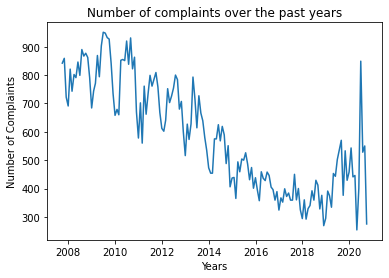

In [19]:
plt.plot(new.resample('M').size())
plt.title('Number of complaints over the past years')
plt.xlabel('Years')
plt.ylabel('Number of Complaints')

In [25]:
comp = new.groupby(["year","COMPLAINT_MONTH"]).count().reset_index()

In [26]:
comp

,year,COMPLAINT_MONTH,LOG_NO,COMPLAINT_DATE,ASSIGNMENT,COMPLAINT_HOUR,COMPLAINT_DAY
0,2007,9,842,842,842,842,842
1,2007,10,859,859,859,859,859
2,2007,11,722,722,722,722,722
3,2007,12,691,691,691,691,691
4,2008,1,821,821,821,821,821
5,2008,2,743,743,743,743,743
6,2008,3,802,802,802,802,802
7,2008,4,791,791,791,791,791
8,2008,5,846,846,846,846,846
9,2008,6,799,799,799,799,799


In [34]:
comp = comp.astype({'year': 'str',"COMPLAINT_MONTH":"str"})

In [27]:
comp.dtypes

year               int64
COMPLAINT_MONTH    int64
LOG_NO             int64
COMPLAINT_DATE     int64
ASSIGNMENT         int64
COMPLAINT_HOUR     int64
COMPLAINT_DAY      int64
dtype: object

In [35]:
lookup = pd.DataFrame()

In [36]:
lookup["year"] = comp["year"]
lookup["month"] = comp["COMPLAINT_MONTH"]
lookup["number_of_complaints"] = comp["LOG_NO"]

In [37]:
lookup.dtypes

year                    object
month                   object
number_of_complaints     int64
dtype: object

In [18]:
c = new["year"].value_counts()

In [38]:
import matplotlib.pyplot as plt

In [19]:
c

2009    10074
2008     9773
2010     9519
2011     8612
2012     8266
2013     7570
2014     6341
2015     5517
2019     5400
2016     4850
2017     4421
2020     4287
2018     4181
2007     3114
Name: year, dtype: int64

In [3]:
data = pd.read_csv("processed_combined_data.csv")

In [4]:
data.shape

(3893886, 13)

In [31]:
lookup.index[(lookup['year'] == 2007) & (lookup["month"] == 9)].tolist()[0]

0

In [32]:
tool = pd.read_csv("tool.csv")

In [33]:
tool.head()

,Date,DATE,TAVG
0,2008-11-15,15/11/2008,38.5
1,2008-07-14,14/07/2008,73.0
2,2008-10-02,2/10/2008,51.5
3,2008-10-11,11/10/2008,65.0
4,2008-12-31,31/12/2008,17.5


In [21]:
int(tool["Date"][0][5:7])

11

In [109]:
def func(date):

    return lookup.index[(lookup['year'] == int(date[0:4])) & (lookup["month"] == int(date[5:7]))].tolist()[0]

In [38]:
lookup["c"] = lookup["year"] + "*" + lookup["month"]

In [39]:
tool["year"] = tool["Date"].apply(lambda x : str(int(x[0:4])))
tool["month"] = tool["Date"].apply(lambda x : str(int(x[5:7])))
tool["c"] = tool["year"]+"*"+tool["month"]

In [40]:
merged_df = pd.merge(tool, lookup, 
                     left_on = 'c', 
                     right_on = 'c', 
                     how='left')


In [41]:
merged_df

,Date,DATE,TAVG,year_x,month_x,c,year_y,month_y,number_of_complaints
0,2008-11-15,15/11/2008,38.5,2008,11,2008*11,2008,11,791
1,2008-07-14,14/07/2008,73.0,2008,7,2008*7,2008,7,890
2,2008-10-02,2/10/2008,51.5,2008,10,2008*10,2008,10,862
3,2008-10-11,11/10/2008,65.0,2008,10,2008*10,2008,10,862
4,2008-12-31,31/12/2008,17.5,2008,12,2008*12,2008,12,684
5,2008-03-28,28/03/2008,33.5,2008,3,2008*3,2008,3,802
6,2008-03-14,14/03/2008,43.5,2008,3,2008*3,2008,3,802
7,2008-03-24,24/03/2008,33.0,2008,3,2008*3,2008,3,802
8,2008-09-10,10/09/2008,60.0,2008,9,2008*9,2008,9,877
9,2008-09-08,8/09/2008,59.5,2008,9,2008*9,2008,9,877


In [29]:
data["number_of_complaints"] = merged_df["number_of_complaints"]

In [44]:
data["month"] = tool["month"]

In [45]:
data.shape


(3893886, 14)

In [46]:
data.reset_index(drop = True).to_csv("processed_combined_data.csv", index = False)

In [42]:
tool

,Date,DATE,TAVG,year,month,c
0,2008-11-15,15/11/2008,38.5,2008,11,2008*11
1,2008-07-14,14/07/2008,73.0,2008,7,2008*7
2,2008-10-02,2/10/2008,51.5,2008,10,2008*10
3,2008-10-11,11/10/2008,65.0,2008,10,2008*10
4,2008-12-31,31/12/2008,17.5,2008,12,2008*12
5,2008-03-28,28/03/2008,33.5,2008,3,2008*3
6,2008-03-14,14/03/2008,43.5,2008,3,2008*3
7,2008-03-24,24/03/2008,33.0,2008,3,2008*3
8,2008-09-10,10/09/2008,60.0,2008,9,2008*9
9,2008-09-08,8/09/2008,59.5,2008,9,2008*9
